In [39]:
from kan import *
import pandas as pd
import torch
torch.set_default_dtype(torch.float64)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)


import matplotlib.pyplot as plt 

# Read the CSV file
dataset_df = pd.read_csv('/home/zyang44/Github/baseline_cicIOT/IoV_power_tiny.csv')
state_mapping = {'idle': 0, 'charging': 1}
attack_mapping = {'syn-flood': 0, 'tcp-flood': 1, 'none': 2, 'cryptojacking': 3, 'syn-stealth': 4, 'vuln-scan': 5, 'Backdoor': 6}
dataset_df['State'] = dataset_df['State'].map(state_mapping)
dataset_df['Attack'] = dataset_df['Attack'].map(attack_mapping)
print(dataset_df.head())

dataset = {
    'train_input': torch.tensor(dataset_df.iloc[:400, :5].values, dtype=torch.float64, device=device),
    'train_label': torch.tensor(dataset_df.iloc[:400, -1:].values, dtype=torch.float64, device=device),
    'test_input': torch.tensor(dataset_df.iloc[400:, :5].values, dtype=torch.float64, device=device),
    'test_label': torch.tensor(dataset_df.iloc[400:, -1:].values, dtype=torch.float64, device=device)
}
print(dataset['train_input'].shape, dataset['train_label'].shape)

cuda:0
   shunt_voltage  bus_voltage_V  current_mA  power_mW  State  Attack
0            608          5.189         752      3300      1       6
1            684          5.185         724      3540      0       6
2            789          5.177         789      4100      1       6
3            784          5.169         654      3540      1       6
4            739          5.181         659      3400      1       6
torch.Size([400, 5]) torch.Size([400, 1])


checkpoint directory created: ./model
saving model version 0.0


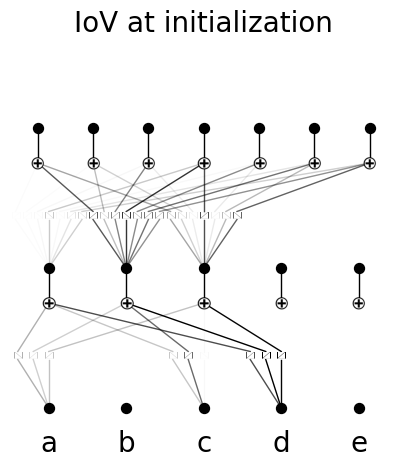

In [40]:
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[5,5,7], grid=5, k=5, seed=42, device=device)
# plot KAN at initialization
model(dataset['train_input'])
model.plot(in_vars = [r'a', 'b', 'c', 'd', 'e'], title='IoV at initialization')

| train_loss: 7.34e-02 | test_loss: 3.86e+00 | reg: 2.24e+01 | : 100%|█| 50/50 [00:35<00:00,  1.42it


saving model version 0.1


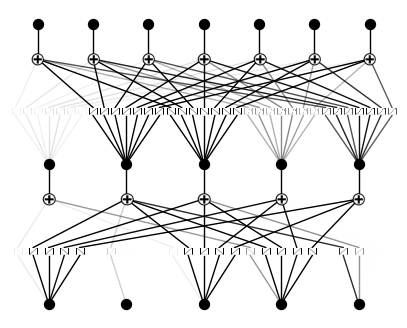

In [41]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001)
model.plot()

saving model version 0.2


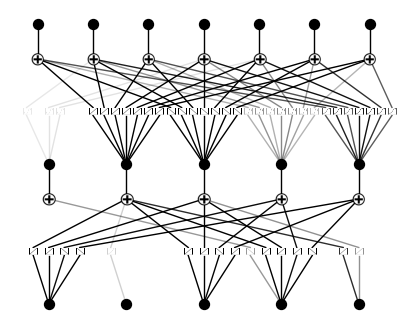

In [42]:
model = model.prune()
model.plot()

In [43]:
# continue training and replot
model.fit(dataset, opt="LBFGS", steps=100)

| train_loss: 3.73e-02 | test_loss: 3.84e+00 | reg: 1.94e+01 | : 100%|█| 100/100 [00:49<00:00,  2.02

saving model version 0.3


{'train_loss': [array(0.08528333),
  array(0.08483121),
  array(0.08360508),
  array(0.07316611),
  array(0.07299284),
  array(0.07238133),
  array(0.0703552),
  array(0.06488385),
  array(0.06434045),
  array(0.06433145),
  array(0.06433393),
  array(0.06432193),
  array(0.06430924),
  array(0.0642958),
  array(0.0642928),
  array(0.06429005),
  array(0.06424324),
  array(0.0642209),
  array(0.0642158),
  array(0.06420455),
  array(0.06418847),
  array(0.06411199),
  array(0.06407498),
  array(0.06391457),
  array(0.06124661),
  array(0.05864037),
  array(0.05661393),
  array(0.05555973),
  array(0.05336862),
  array(0.04891861),
  array(0.04851664),
  array(0.04826006),
  array(0.04819027),
  array(0.04814807),
  array(0.04812344),
  array(0.0481057),
  array(0.04804241),
  array(0.04798526),
  array(0.04796005),
  array(0.04795374),
  array(0.04795019),
  array(0.04794175),
  array(0.04786356),
  array(0.04778428),
  array(0.04763964),
  array(0.04758738),
  array(0.04727018),
  arr

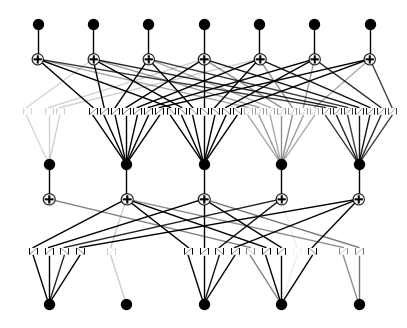

In [44]:
model.plot()

skipping (0,0,0) since already symbolic
fixing (0,0,1) with x, r2=0.9999999993876518, c=1
fixing (0,0,2) with x, r2=0.9999999999715368, c=1
fixing (0,0,3) with x, r2=0.9999999999745833, c=1
fixing (0,0,4) with x, r2=0.9999999999979187, c=1
fixing (0,1,0) with 0
fixing (0,1,1) with x, r2=0.9876675750800641, c=1
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,1,4) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with x, r2=0.9999999931585902, c=1
fixing (0,2,2) with x, r2=0.9999999997229337, c=1
fixing (0,2,3) with x, r2=0.9999999999878033, c=1
fixing (0,2,4) with x, r2=0.9999999999822686, c=1
fixing (0,3,0) with x, r2=1.000000000000001, c=1
fixing (0,3,1) with x, r2=0.99999999621202, c=1
fixing (0,3,2) with x, r2=0.9999999998436212, c=1
fixing (0,3,3) with x, r2=0.999999991632037, c=1
fixing (0,3,4) with x, r2=0.9999999999980917, c=1
fixing (0,4,0) with 0
fixing (0,4,1) with x, r2=0.9999999994418303, c=1
fixing (0,4,2) with x, r2=0.9999999999441076, c=1
fixing (0,4,3) with 0
fixing (0,

| train_loss: 3.89e-03 | test_loss: 3.83e+00 | reg: 0.00e+00 | : 100%|█| 50/50 [01:06<00:00,  1.33s/


saving model version 0.5


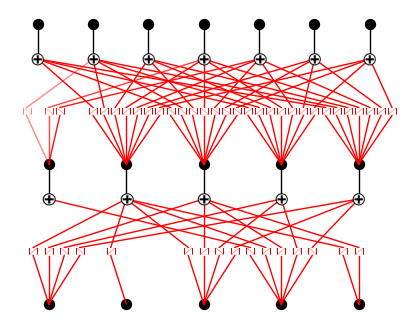

In [47]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

model.fit(dataset, opt="LBFGS", steps=50)
model.plot()

In [57]:
from kan.utils import ex_round
# ex_round(model.symbolic_formula()[0][0],5)
ex_round(model.symbolic_formula()[0][0],5)

2.0e-5*x_1 + 0.68429*x_2 + 1.0e-5*x_3 - 1.0e-5*x_5 + 2.43379

(array([-2848.91668574, -2839.35656263, -2820.23631642, ...,
        -1051.61354141, -1051.61354141, -1032.49329519]),
 array([-0.0023702 , -0.00244467, -0.00259361, ..., -0.01637076,
        -0.01637076, -0.0165197 ]))

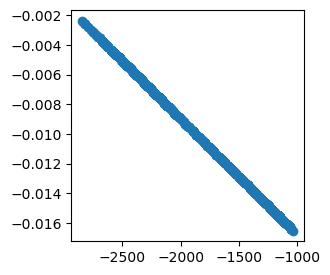

In [60]:
model.get_fun(1,0,1)